# Run model module locally

In [155]:
import math
import os

def convert_conv_layer_property_lists_to_string(property_list, prop_list_len):
    """Convert conv layer property list to string.

    Args:
        property_list: list, nested list of blocks of a conv layer property.
        prop_list_len: int, length of list to process.

    Returns:
        Doubly delimited string of conv layer property values.
    """
    return (";").join(
        [
            (",").join([str(val) for val in block])
            for block in property_list[0:prop_list_len]
        ]
    )
    

# Import os environment variables for file hyperparameters.
os.environ["TRAIN_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/data/cifar10_car/train*.tfrecord"
os.environ["EVAL_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/data/cifar10_car/test*.tfrecord"
os.environ["OUTPUT_DIR"] = "gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model"

# Import os environment variables for train hyperparameters.
os.environ["TRAIN_BATCH_SIZE"] = str(16)
os.environ["TRAIN_STEPS"] = str(3000)
os.environ["USE_TPU"] = "False"

# Import os environment variables for eval hyperparameters.
os.environ["EVAL_BATCH_SIZE"] = str(8)
os.environ["EVAL_STEPS"] = str(10)
os.environ["START_DELAY_SECS"] = str(6000)
os.environ["THROTTLE_SECS"] = str(6000)
os.environ["EVAL_ON_TPU"] = "False"

# Import os environment variables for serving hyperparameters.
os.environ["EXPORTS_TO_KEEP"] = str(20)
os.environ["EXPORT_TO_TPU"] = "False"
os.environ["EXPORT_TO_CPU"] = "True"
os.environ["PREDICT_ALL_RESOLUTIONS"] = "True"
os.environ["ANOMALY_THRESHOLD"] = str(5.0)
os.environ["ANOM_CONVEX_COMBO_FACTOR"] = str(0.05)

# Import os environment variables for image hyperparameters.
os.environ["HEIGHT"] = str(32)
os.environ["WIDTH"] = str(32)
os.environ["DEPTH"] = str(3)

# Import os environment variables for shared hyperparameters.
os.environ["NUM_STEPS_UNTIL_GROWTH"] = str(1000)

# Full lists for full 1024x1024 network growth.
full_conv_num_filters = [[512, 512], [512, 512], [512, 512], [512, 512], [256, 256], [128, 128], [64, 64], [32, 32], [16, 16]]
full_conv_kernel_sizes = [[4, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3]]
full_conv_strides = [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]]

# Set final image size as a multiple of 2, starting at 4.
image_size = 4
prop_list_len = max(
    min(int(math.log(image_size, 2) - 1), len(full_conv_num_filters)), 1
)

# Get slices of lists.
conv_num_filters = convert_conv_layer_property_lists_to_string(
    full_conv_num_filters, prop_list_len
)
print("conv_num_filters = {}".format(conv_num_filters))
conv_kernel_sizes = convert_conv_layer_property_lists_to_string(
    full_conv_kernel_sizes, prop_list_len
)
print("conv_kernel_sizes = {}".format(conv_kernel_sizes))
conv_strides = convert_conv_layer_property_lists_to_string(
    full_conv_strides, prop_list_len
)
print("conv_strides = {}".format(conv_strides))

os.environ["CONV_NUM_FILTERS"] = conv_num_filters
os.environ["CONV_KERNEL_SIZES"] = conv_kernel_sizes
os.environ["CONV_STRIDES"] = conv_strides

# Import os environment variables for generator hyperparameters.
os.environ["LATENT_SIZE"] = str(512)
os.environ["NORMALIZE_LATENT"] = "True"
os.environ["USE_PIXEL_NORM"] = "True"
os.environ["PIXEL_NORM_EPSILON"] = str(1e-8)
os.environ["GENERATOR_PROJECTION_DIMS"] = "4,4,512"
os.environ["GENERATOR_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["GENERATOR_TO_RGB_ACTIVATION"] = "None"
os.environ["GENERATOR_L1_REGULARIZATION_SCALE"] = str(0.01)
os.environ["GENERATOR_L2_REGULARIZATION_SCALE"] = str(0.01)
os.environ["GENERATOR_OPTIMIZER"] = "Adam"
os.environ["GENERATOR_LEARNING_RATE"] = str(0.0001)
os.environ["GENERATOR_ADAM_BETA1"] = str(0.)
os.environ["GENERATOR_ADAM_BETA2"] = str(0.99)
os.environ["GENERATOR_ADAM_EPSILON"] = str(1e-8)
os.environ["GENERATOR_CLIP_GRADIENTS"] = str(5.0)
os.environ["GENERATOR_TRAIN_STEPS"] = str(1)

# Import os environment variables for discriminator hyperparameters.
os.environ["USE_MINIBATCH_STDDEV"] = "True"
os.environ["MINIBATCH_STDDEV_GROUP_SIZE"] = str(4)
os.environ["MINIBATCH_STDDEV_AVERAGING"] = "True"
os.environ["DISCRIMINATOR_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["DISCRIMINATOR_L1_REGULARIZATION_SCALE"] = str(0.01)
os.environ["DISCRIMINATOR_L2_REGULARIZATION_SCALE"] = str(0.01)
os.environ["DISCRIMINATOR_OPTIMIZER"] = "Adam"
os.environ["DISCRIMINATOR_LEARNING_RATE"] = str(0.0001)
os.environ["DISCRIMINATOR_ADAM_BETA1"] = str(0.)
os.environ["DISCRIMINATOR_ADAM_BETA2"] = str(0.99)
os.environ["DISCRIMINATOR_ADAM_EPSILON"] = str(1e-8)
os.environ["DISCRIMINATOR_CLIP_GRADIENTS"] = str(5.0)
os.environ["DISCRIMINATOR_GRADIENT_PENALTY_COEFFICIENT"] = str(10.0)
os.environ["EPSILON_DRIFT"] = str(0.001)
os.environ["DISCRIMINATOR_TRAIN_STEPS"] = str(1)

# Import os environment variables for encoder hyperparameters.
os.environ["ENCODER_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["ENCODER_L1_REGULARIZATION_SCALE"] = str(0.01)
os.environ["ENCODER_L2_REGULARIZATION_SCALE"] = str(0.01)
os.environ["ENCODER_OPTIMIZER"] = "Adam"
os.environ["ENCODER_LEARNING_RATE"] = str(0.0001)
os.environ["ENCODER_ADAM_BETA1"] = str(0.)
os.environ["ENCODER_ADAM_BETA2"] = str(0.99)
os.environ["ENCODER_ADAM_EPSILON"] = str(1e-8)
os.environ["ENCODER_CLIP_GRADIENTS"] = str(5.0)


conv_num_filters = 512,512
conv_kernel_sizes = 4,3
conv_strides = 1,1


## Train pg_AnoGAN_Sim_Enc model

In [161]:
%%bash
gsutil rm -rf ${OUTPUT_DIR}
export PYTHONPATH=$PYTHONPATH:$PWD/pg_anogan_sim_enc_tpu_module
python3 -m trainer.task \
    --train_file_pattern=${TRAIN_FILE_PATTERN} \
    --eval_file_pattern=${EVAL_FILE_PATTERN} \
    --output_dir=${OUTPUT_DIR} \
    --job-dir=./tmp \
    \
    --train_batch_size=${TRAIN_BATCH_SIZE} \
    --train_steps=${TRAIN_STEPS} \
    --use_tpu=${USE_TPU} \
    \
    --eval_batch_size=${EVAL_BATCH_SIZE} \
    --eval_steps=${EVAL_STEPS} \
    --start_delay_secs=${START_DELAY_SECS} \
    --throttle_secs=${THROTTLE_SECS} \
    --eval_on_tpu=${EVAL_ON_TPU} \
    \
    --exports_to_keep=${EXPORTS_TO_KEEP} \
    --export_to_tpu=${EXPORT_TO_TPU} \
    --export_to_cpu=${EXPORT_TO_CPU} \
    --predict_all_resolutions=${PREDICT_ALL_RESOLUTIONS} \
    --anomaly_threshold=${ANOMALY_THRESHOLD} \
    --anom_convex_combo_factor=${ANOM_CONVEX_COMBO_FACTOR} \
    \
    --height=${HEIGHT} \
    --width=${WIDTH} \
    --depth=${DEPTH} \
    \
    --num_steps_until_growth=${NUM_STEPS_UNTIL_GROWTH} \
    --conv_num_filters=${CONV_NUM_FILTERS} \
    --conv_kernel_sizes=${CONV_KERNEL_SIZES} \
    --conv_strides=${CONV_STRIDES} \
    \
    --latent_size=${LATENT_SIZE} \
    --normalize_latent=${NORMALIZE_LATENT} \
    --use_pixel_norm=${USE_PIXEL_NORM} \
    --pixel_norm_epsilon=${PIXEL_NORM_EPSILON} \
    --generator_projection_dims=${GENERATOR_PROJECTION_DIMS} \
    --generator_leaky_relu_alpha=${GENERATOR_LEAKY_RELU_ALPHA} \
    --generator_to_rgb_activation=${GENERATOR_TO_RGB_ACTIVATION} \
    --generator_l1_regularization_scale=${GENERATOR_L1_REGULARIZATION_SCALE} \
    --generator_l2_regularization_scale=${GENERATOR_L2_REGULARIZATION_SCALE} \
    --generator_optimizer=${GENERATOR_OPTIMIZER} \
    --generator_learning_rate=${GENERATOR_LEARNING_RATE} \
    --generator_adam_beta1=${GENERATOR_ADAM_BETA1} \
    --generator_adam_beta2=${GENERATOR_ADAM_BETA2} \
    --generator_adam_epsilon=${GENERATOR_ADAM_EPSILON} \
    --generator_clip_gradients=${GENERATOR_CLIP_GRADIENTS} \
    --generator_train_steps=${GENERATOR_TRAIN_STEPS} \
    \
    --use_minibatch_stddev=${USE_MINIBATCH_STDDEV} \
    --minibatch_stddev_group_size=${MINIBATCH_STDDEV_GROUP_SIZE} \
    --minibatch_stddev_averaging=${MINIBATCH_STDDEV_AVERAGING} \
    --discriminator_leaky_relu_alpha=${DISCRIMINATOR_LEAKY_RELU_ALPHA} \
    --discriminator_l1_regularization_scale=${DISCRIMINATOR_L1_REGULARIZATION_SCALE} \
    --discriminator_l2_regularization_scale=${DISCRIMINATOR_L2_REGULARIZATION_SCALE} \
    --discriminator_optimizer=${DISCRIMINATOR_OPTIMIZER} \
    --discriminator_learning_rate=${DISCRIMINATOR_LEARNING_RATE} \
    --discriminator_adam_beta1=${DISCRIMINATOR_ADAM_BETA1} \
    --discriminator_adam_beta2=${DISCRIMINATOR_ADAM_BETA2} \
    --discriminator_adam_epsilon=${DISCRIMINATOR_ADAM_EPSILON} \
    --discriminator_clip_gradients=${DISCRIMINATOR_CLIP_GRADIENTS} \
    --discriminator_gradient_penalty_coefficient=${DISCRIMINATOR_GRADIENT_PENALTY_COEFFICIENT} \
    --epsilon_drift=${EPSILON_DRIFT} \
    --discriminator_train_steps=${DISCRIMINATOR_TRAIN_STEPS} \
    \
    --encoder_leaky_relu_alpha=${ENCODER_LEAKY_RELU_ALPHA} \
    --encoder_l1_regularization_scale=${ENCODER_L1_REGULARIZATION_SCALE} \
    --encoder_l2_regularization_scale=${ENCODER_L2_REGULARIZATION_SCALE} \
    --encoder_optimizer=${ENCODER_OPTIMIZER} \
    --encoder_learning_rate=${ENCODER_LEARNING_RATE} \
    --encoder_adam_beta1=${ENCODER_ADAM_BETA1} \
    --encoder_adam_beta2=${ENCODER_ADAM_BETA2} \
    --encoder_adam_epsilon=${ENCODER_ADAM_EPSILON} \
    --encoder_clip_gradients=${ENCODER_CLIP_GRADIENTS}

train_and_evaluate: args = {'train_file_pattern': 'gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/data/cifar10_car/train*.tfrecord', 'eval_file_pattern': 'gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/data/cifar10_car/test*.tfrecord', 'output_dir': 'gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model/', 'train_batch_size': 16, 'train_steps': 3000, 'prev_train_steps': 0, 'use_tpu': False, 'eval_batch_size': 8, 'eval_steps': 10, 'start_delay_secs': 6000, 'throttle_secs': 6000, 'eval_on_tpu': False, 'exports_to_keep': 20, 'export_to_tpu': False, 'export_to_cpu': True, 'predict_all_resolutions': True, 'anomaly_threshold': 5.0, 'anom_convex_combo_factor': 0.05, 'height': 32, 'width': 32, 'depth': 3, 'num_steps_until_growth': 1000, 'conv_num_filters': [[512, 512]], 'conv_kernel_sizes': [[4, 3]], 'conv_strides': [[1, 1]], 'latent_size': 512, 'use_pixel_norm': True, 'pixel_norm_epsilon': 1e-08, 'normalize_latent': True, 'generator_projection_dims': [4, 4, 5

CommandException: 1 files/objects could not be removed.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


INFO:tensorflow:Using config: {'_model_dir': 'gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 100, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': None, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribut

## Predictions

In [162]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [163]:
# Get data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("x_train.shape = {}".format(x_train.shape))
print("y_train.shape = {}".format(y_train.shape))
print("x_test.shape = {}".format(x_test.shape))
print("y_test.shape = {}".format(y_test.shape))

x_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
x_test.shape = (10000, 32, 32, 3)
y_test.shape = (10000, 1)


In [164]:
!gsutil ls gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model/export/exporter | tail -1

gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model/export/exporter/1591961908/


In [165]:
predict_fn = tf.contrib.predictor.from_saved_model(
    "gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model/export/exporter/1591961908/"
)
predictions = predict_fn(
    {
        "query_image": x_test[0:10]
    }
)

INFO:tensorflow:Restoring parameters from gs://machine-learning-1234-bucket/gan/pg_anogan_sim_enc/trained_model/export/exporter/1591961908/variables/variables


In [166]:
print(list(predictions.keys()))

['encoded_images_4x4', 'anomaly_scores_4x4', 'anomaly_flags_4x4']


In [167]:
encoded_images = {k: v for k, v in predictions.items() if k[0:14] == "encoded_images"}
list(encoded_images.keys())

['encoded_images_4x4']

In [168]:
anomaly_scores = {k: v for k, v in predictions.items() if k[0:14] == "anomaly_scores"}
list(anomaly_scores.keys())

['anomaly_scores_4x4']

In [169]:
anomaly_flags = {k: v for k, v in predictions.items() if k[0:13] == "anomaly_flags"}
list(anomaly_flags.keys())

['anomaly_flags_4x4']

In [170]:
def sort_dict_by_image_size(input_dict):
    """Sort predictions dictionary by image size.
    
    Args:
        input_dict: dict, contains prediction keys and array values.
    Return:
        Sorted input dictionary on image size in ascending order.
    """
    sorted_input_dict = [
        x[0:2]
        for x in sorted(
            [
                (
                    k,
                    input_dict[k],
                    int(k.split("x")[-1])
                )
                for k in input_dict.keys()
            ],
            key=lambda tup: tup[2]
        )
    ]

    for k, v in sorted_input_dict:
        print(k, v.shape)

    return sorted_input_dict

Convert image back to the original scale.

In [171]:
encoded_images = {
    k: np.clip(
        a=((v + 1.0) * (255. / 2)).astype(np.int32),
        a_min=0,
        a_max=255
    )
    for k, v in encoded_images.items()
}

sorted_encoded_images = sort_dict_by_image_size(encoded_images)

encoded_images_4x4 (10, 4, 4, 3)


In [172]:
sorted_anomaly_scores = sort_dict_by_image_size(anomaly_scores)

anomaly_scores_4x4 (10,)


In [173]:
sorted_anomaly_flags = sort_dict_by_image_size(anomaly_flags)

anomaly_flags_4x4 (10,)


encoded_images_4x4


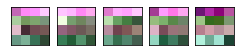

In [174]:
num_images = 5

for k, v in sorted_encoded_images:
    print(k)
    plt.figure(figsize=(int(k.split("x")[-1]), int(k.split("x")[-1])))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(v[i], cmap=plt.cm.binary)
    plt.show()

In [175]:
for k, v in sorted_anomaly_scores:
    print(k)
    print(v)

anomaly_scores_4x4
[-0.36319256 -0.4460332  -0.3430669  -0.22148114 -0.2577624  -0.2967108
 -0.4022779  -0.32170016 -0.4400419  -0.51137537]


In [176]:
for k, v in sorted_anomaly_flags:
    print(k)
    print(v)

anomaly_flags_4x4
[0 0 0 0 0 0 0 0 0 0]
